In [6]:
# Loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the number of numeric columns
df = pd.read_csv("../data/processed/global_findex_cleaned.csv")
df.select_dtypes(include=['number']).columns


Index(['year', 'pop_adult', 'account_t_d', 'fiaccount_t_d',
       'mobileaccount_t_d', 'borrow_any_t_d', 'fin4_d', 'dig_acc', 'fin26a',
       'fin26b',
       ...
       'con18', 'con19', 'internet', 'con26d', 'con27', 'con30a', 'con30b',
       'con30c', 'con30d', 'con30e'],
      dtype='object', length=120)

In [21]:
# Check unique values
print("\nUnique values:")
df['mobileaccount_t_d'].unique()

# Summary statistics
print("\nSummary statistics:")
df['mobileaccount_t_d'].describe()




Unique values:

Summary statistics:


count    2226.000000
mean        0.296783
std         0.191594
min         0.000000
25%         0.142040
50%         0.261429
75%         0.424543
max         0.939388
Name: mobileaccount_t_d, dtype: float64


The distribution for mobile money accounts:


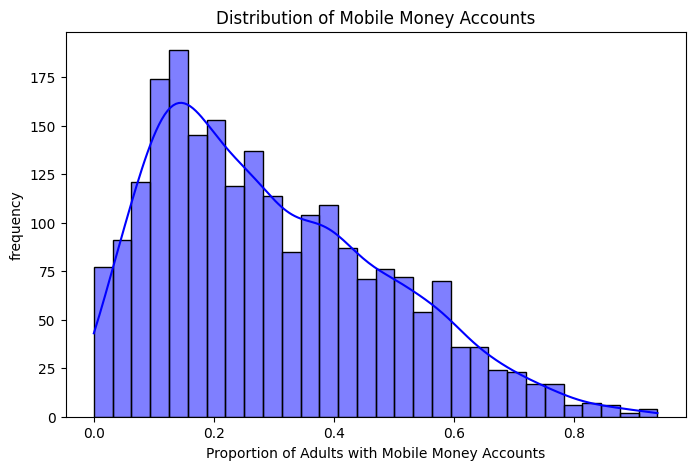

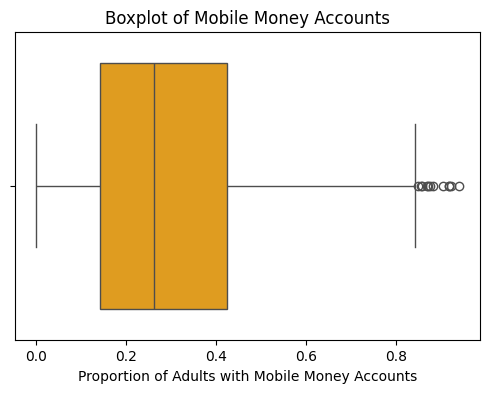

In [22]:
# Plot histogram for the variable
print("\nThe distribution for mobile money accounts:")
plt.figure(figsize=(8,5))
sns.histplot(df['mobileaccount_t_d'].dropna(), bins=30, kde=True, color='blue')
plt.title("Distribution of Mobile Money Accounts")
plt.xlabel("Proportion of Adults with Mobile Money Accounts")
plt.ylabel("frequency")
plt.show()

# Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df['mobileaccount_t_d'].dropna(), color='orange')
plt.title("Boxplot of Mobile Money Accounts")
plt.xlabel("Proportion of Adults with Mobile Money Accounts")
plt.show()

Compare Mobile Account Ownership with any Financial Account Ownership


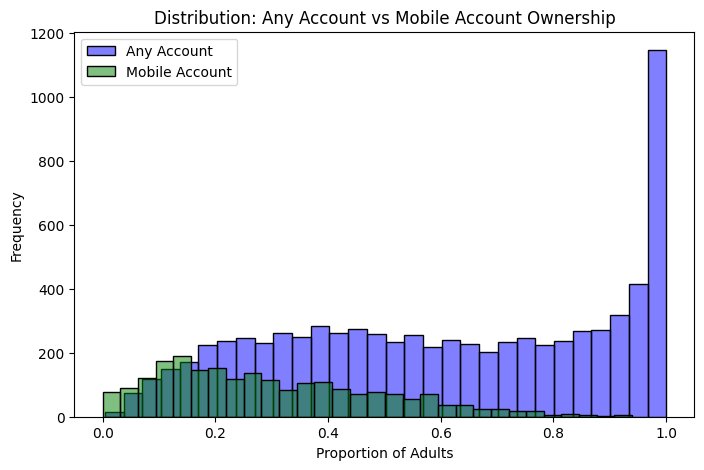

In [25]:
# Overlay Histogram
print("Compare Mobile Account Ownership with any Financial Account Ownership")

# Plot account ownership distribution
plt.figure(figsize=(8,5))
sns.histplot(df['account_t_d'].dropna(), bins=30, color='blue', alpha=0.5, label='Any Account')

# Plot mobile account ownership distribution
sns.histplot(df['mobileaccount_t_d'].dropna(), bins=30, color='green', alpha=0.5, label='Mobile Account')
plt.xlabel("Proportion of Adults")
plt.ylabel("Frequency")
plt.title("Distribution: Any Account vs Mobile Account Ownership")
plt.legend()
plt.show()

                                       regionwb24_hi  mobileaccount_t_d
6         Sub-Saharan Africa (excluding high income)           0.352906
0        East Asia & Pacific (excluding high income)           0.288633
2                                        High income           0.288196
3  Latin America & Caribbean (excluding high income)           0.223530
1      Europe & Central Asia (excluding high income)           0.213066
5                 South Asia (excluding high income)           0.176679
4  Middle East & North Africa (excluding high inc...           0.133842


C:\Users\Aidid\AppData\Local\Temp\ipykernel_16776\3746121654.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= region_mobile_adoption,


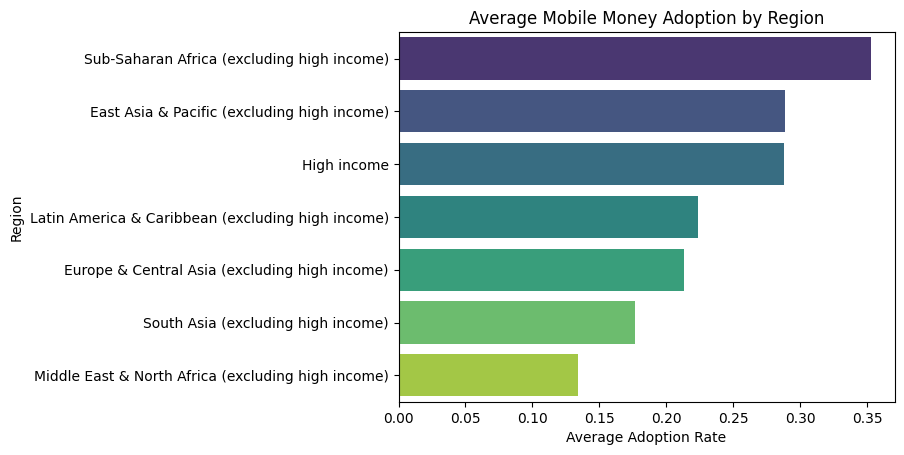

In [27]:
# Regional Comparison
# Group data by region and calculate mean mobile money adoption
region_mobile_adoption = df.groupby("regionwb24_hi")["mobileaccount_t_d"].mean().reset_index()

# Sort for better readability (highest adoption on top)
region_mobile_adoption = region_mobile_adoption.sort_values(by="mobileaccount_t_d", ascending=False)
print(region_mobile_adoption)

# Plot a Bar Chart
plt.Figure(figsize=(10,6))
sns.barplot(data= region_mobile_adoption,
            x = "mobileaccount_t_d",
            y = "regionwb24_hi",
            palette="viridis")
plt.title("Average Mobile Money Adoption by Region")
plt.xlabel("Average Adoption Rate")
plt.ylabel("Region")
plt.show()


                                       regionwb24_hi  mobileaccount_t_d  \
0        East Asia & Pacific (excluding high income)           0.288633   
1      Europe & Central Asia (excluding high income)           0.213066   
2                                        High income           0.288196   
3  Latin America & Caribbean (excluding high income)           0.223530   
4  Middle East & North Africa (excluding high inc...           0.133842   
5                 South Asia (excluding high income)           0.176679   
6         Sub-Saharan Africa (excluding high income)           0.352906   

   account_t_d  
0     0.568031  
1     0.552801  
2     0.877423  
3     0.475902  
4     0.377830  
5     0.491630  
6     0.426943  


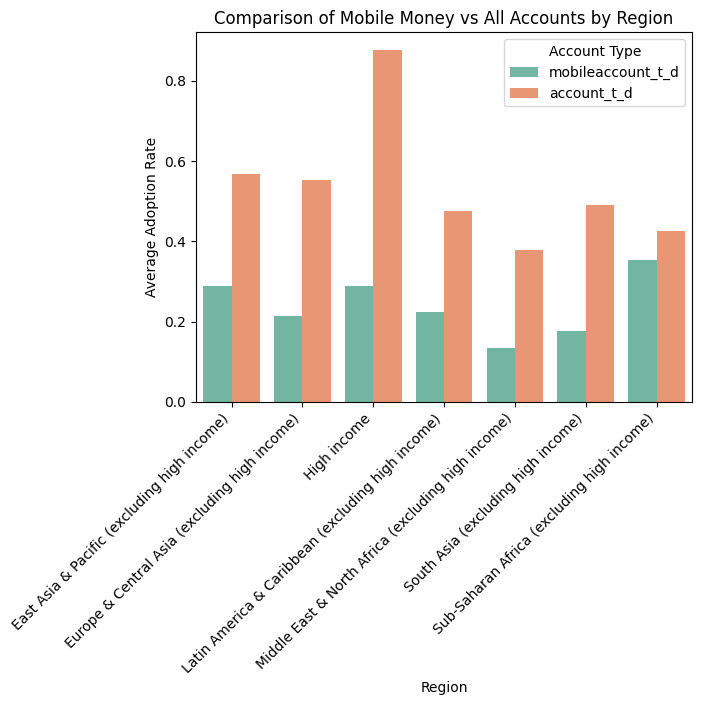

In [29]:
# Comparing Mobile Money and Any Accounts Distribution by Regions

# Group data
region_accounts = df.groupby("regionwb24_hi")[["mobileaccount_t_d", "account_t_d"]].mean().reset_index()
print(region_accounts) 

# Melt DataFrame for easier plotting
region_melted = region_accounts.melt(id_vars="regionwb24_hi",
                                     value_vars=["mobileaccount_t_d", "account_t_d"],
                                     var_name= "Account_Type",
                                     value_name= "Average_Rate")

# Plot grouped bar chart
plt.Figure(figsize=(12,6))
sns.barplot(data=region_melted,
            x="regionwb24_hi",
            y="Average_Rate",
            hue="Account_Type",
            palette="Set2")
plt.title("Comparison of Mobile Money vs All Accounts by Region")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Adoption Rate")
plt.xlabel("Region")
plt.legend(title= "Account Type")
plt.show()

       incomegroupwb24  mobileaccount_t_d  account_t_d
0          High income           0.288196     0.877423
1           Low income           0.298415     0.334901
2  Lower middle income           0.314183     0.434674
3  Upper middle income           0.273517     0.573724


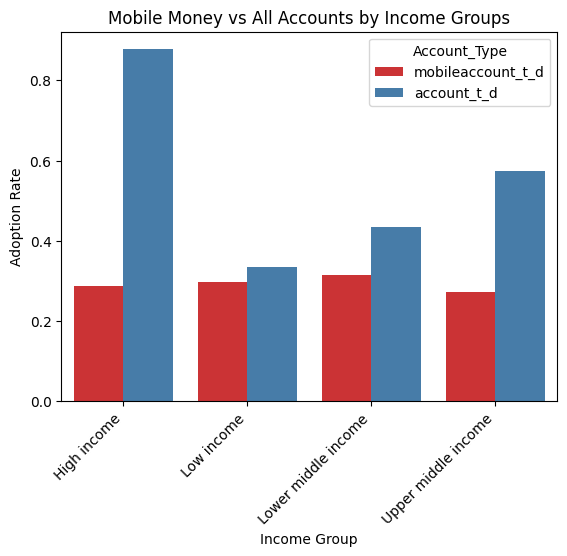

In [32]:
# Comparison by Income Groups

# Group and summarize by income groups
income_accounts = df.groupby("incomegroupwb24")[["mobileaccount_t_d", "account_t_d"]].mean().reset_index()
print(income_accounts)

# Visualization (Grouped Bar Chart)
# Melt for plotting
income_melted = income_accounts.melt(id_vars="incomegroupwb24",
                                     value_vars=["mobileaccount_t_d", "account_t_d"],
                                     var_name="Account_Type",
                                     value_name="Average_Rate")

# Bar Chart
plt.Figure(figsize=(8,5))
sns.barplot(data=income_melted,
            x= "incomegroupwb24",
            y= "Average_Rate",
            hue="Account_Type",
            palette="Set1")
plt.title("Mobile Money vs All Accounts by Income Groups")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Adoption Rate")
plt.xlabel("Income Group")
plt.show()

   year  mobileaccount_t_d  account_t_d
0  2011                NaN     0.501667
1  2014           0.169364     0.557880
2  2017           0.239781     0.603924
3  2021           0.303728     0.702698
4  2022           0.250014     0.380437
5  2024           0.358499     0.697041


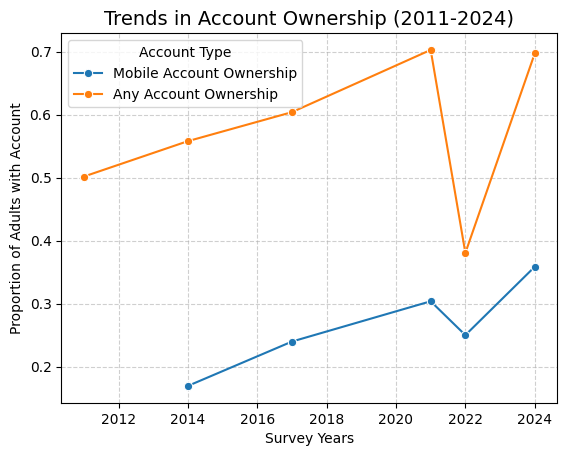

In [36]:
# Tracking change in mobile and any account ownership over survey years
# Grouping data by years and calculating the average change
yearly_account = df.groupby(['year'])[["mobileaccount_t_d", "account_t_d"]].mean().reset_index()
print(yearly_account)

# Plot a line chart
plt.Figure(figsize=(10,6))
sns.lineplot(data=yearly_account, x="year", y="mobileaccount_t_d", marker="o", label="Mobile Account Ownership")
sns.lineplot(data=yearly_account, x="year", y="account_t_d", marker="o", label="Any Account Ownership")
plt.title("Trends in Account Ownership (2011-2024)", fontsize=14)
plt.xlabel("Survey Years")
plt.ylabel("Proportion of Adults with Account")
plt.legend(title="Account Type")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [38]:
# Compare how mobile adoption evolved over time by income level
# Group data by year and income level
yearly_income = df.groupby(["year", "incomegroupwb24"])[["mobileaccount_t_d", "account_t_d"]].mean().reset_index()
print(yearly_income)

    year      incomegroupwb24  mobileaccount_t_d  account_t_d
0   2011          High income                NaN     0.805506
1   2011           Low income                NaN     0.179819
2   2011  Lower middle income                NaN     0.277722
3   2011  Upper middle income                NaN     0.411899
4   2014          High income           0.080347     0.859116
5   2014           Low income           0.196052     0.237487
6   2014  Lower middle income           0.200683     0.351417
7   2014  Upper middle income           0.103137     0.510519
8   2017          High income           0.163960     0.878690
9   2017           Low income           0.229852     0.324577
10  2017  Lower middle income           0.279977     0.436761
11  2017  Upper middle income           0.212960     0.580099
12  2021          High income           0.201089     0.928846
13  2021           Low income           0.323955     0.441983
14  2021  Lower middle income           0.322210     0.507198
15  2021